# Historical Trends
 As we saw on the plots obtained with `explore_content` and expected from environmental/atmospheric variables from a place outside the tropics, there seem to be a strong seasonality component.


 We could use `filter_df`to extract the data from the dates that we expect to be of a season, but instead we will use the method `group_by`

In [6]:
from funciones import*
import pandas as pd
import matplotlib.pyplot as plt
Data=pd.read_csv("../../data/Time_series_DATA.txt",skiprows=149,index_col=0)
Data.head()
Data=Data.drop(columns=['Predicted ice thickness [m]','Noisy predicted ice thickness [m]'])
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)
Data.index = Data.index.astype(str).str.split().str[0]
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")
Data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40656 entries, 1911-12-01 to 2024-02-06
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Regional: Air temperature [C]                      38563 non-null  float64
 1   Days since start of year                           38563 non-null  float64
 2   Days until break up                                38563 non-null  float64
 3   Nenana: Rainfall [mm]                              29547 non-null  float64
 4   Nenana: Snowfall [mm]                              19945 non-null  float64
 5   Nenana: Snow depth [mm]                            15984 non-null  float64
 6   Nenana: Mean water temperature [C]                 2418 non-null   float64
 7   Nenana: Mean Discharge [m3/s]                      22562 non-null  float64
 8   Nenana: Air temperature [C]                        31171 non-null  fl

:::{card} Exercise 1

Use the function `seasonal_trends` to plot the seasonal variation of the variables
:::

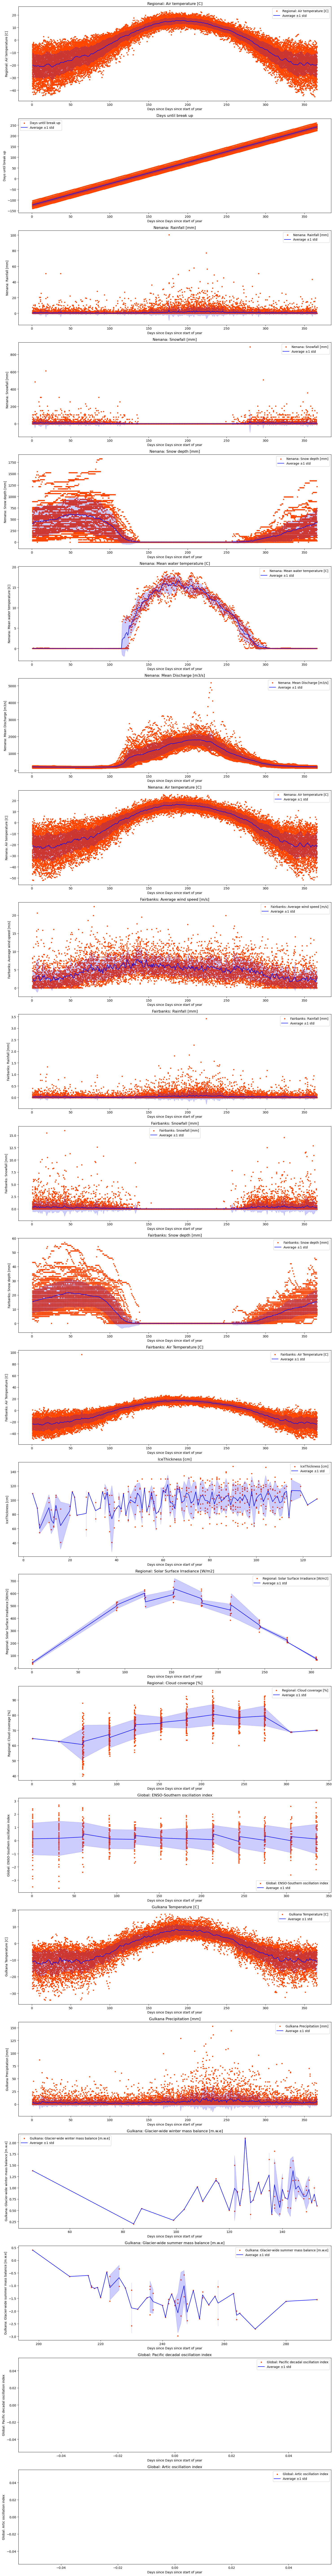

In [7]:
seasonal_trends(Data,k=1,plot_mean_std=True)

# Comparing years to baseline

:::{card} Exercise 2
use the option `historicalVariation` to plot the seasonal variation of each year, compare to the mean variation.
:::

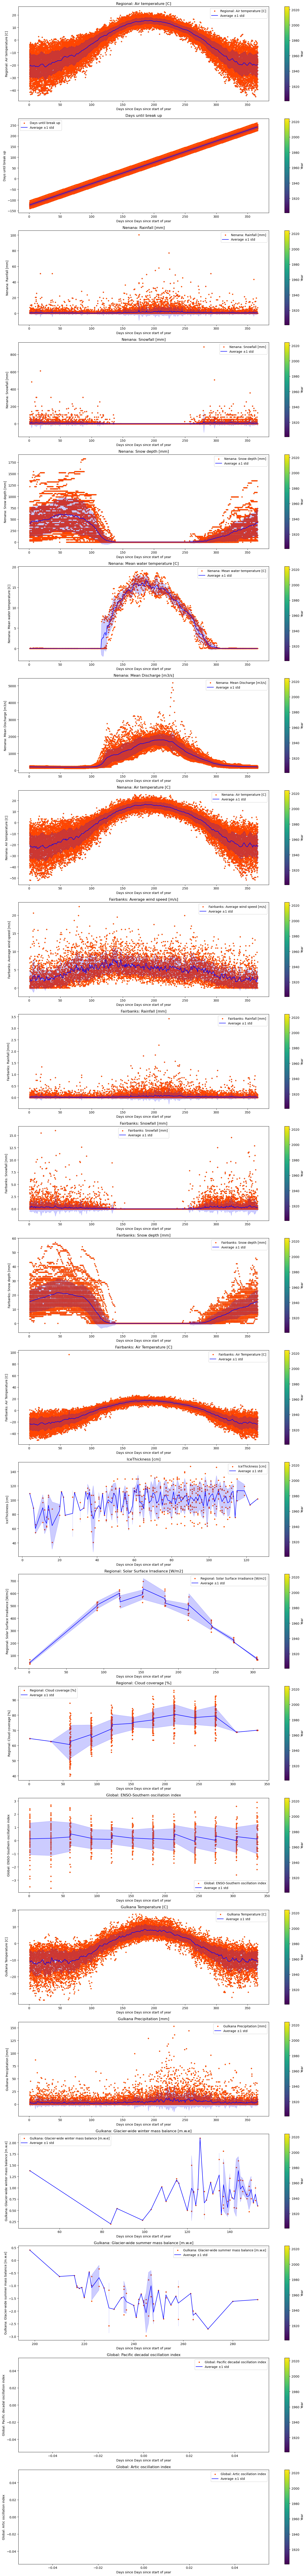

In [8]:
seasonal_trends(Data,historicalVariation=True)

:::{card} Exercise 3
 There us still to much information, use arguments `columns_to_plot`, `multiyear` and `Compare_years_to_baseline` to plot the yearly variation of `['Regional: Air temperature [C]', 'Nenana: Snow depth [mm]',and 'Nenana: Mean Discharge [m3/s]'` for  ['2000, 2008, 2009, 2012, 2020']`  compared to the baseline $\pm$ 1.5 $\sigma$ 
:::

No Nenana: Snow depth [mm] data available for year 2008
No Nenana: Snow depth [mm] data available for year 2019
No Nenana: Snow depth [mm] data available for year 2012
No Nenana: Snow depth [mm] data available for year 2020


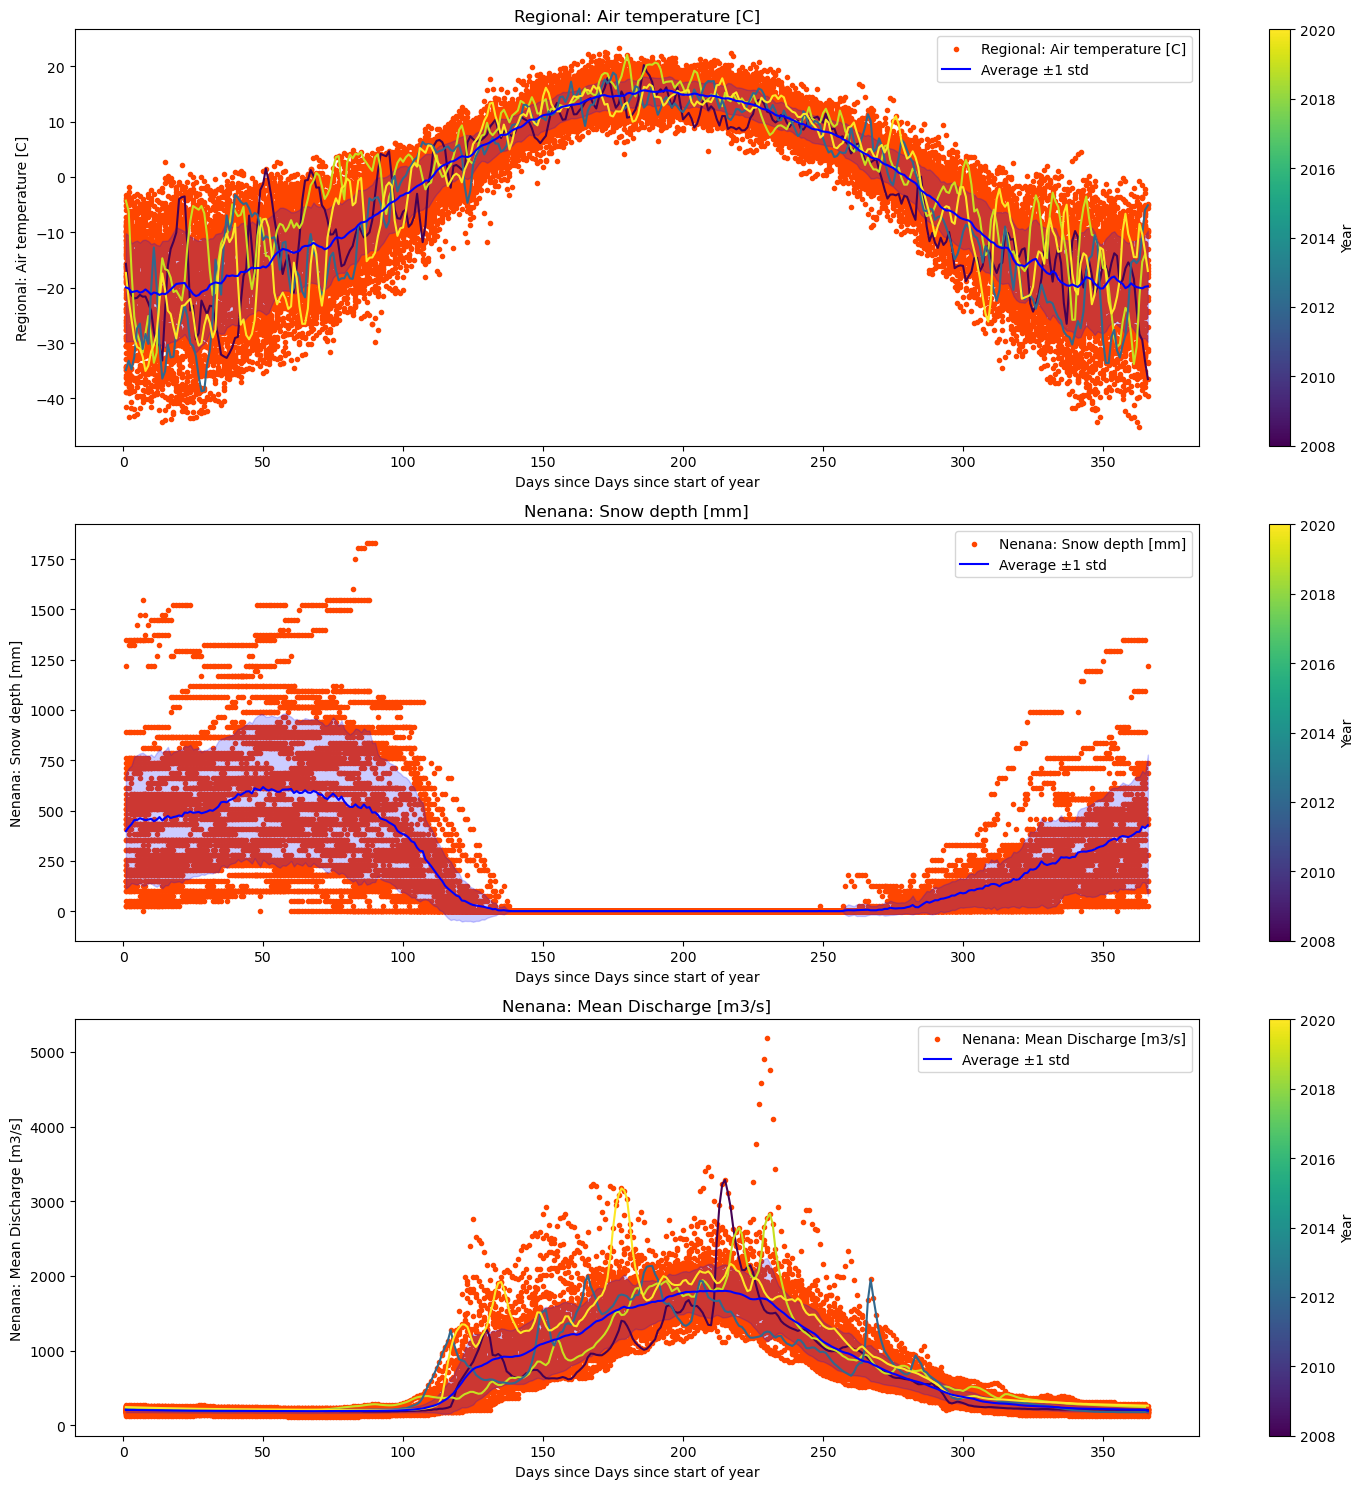

In [9]:
seasonal_trends(Data,k=1,plot_mean_std=True,multiyear=[2008,2019,2012,2020],Compare_years_to_baseline=True,columns_to_plot=['Regional: Air temperature [C]','Nenana: Snow depth [mm]','Nenana: Mean Discharge [m3/s]'])

So far, we can use explore the yearly variation of our variables, however, the fact that we use `Days since start of year` as our x axis is completely arbitrary, much more likely, we care about days since a particular event, this could be days since beginning of winter, since since freezing of the river, or since (until) break up. 

Use the function `days_since_last_date` to plot the temperature seasonal variation using *days since the start of winter* as the x axis.
Repeat the same procedure, but using  the beginning of spring.

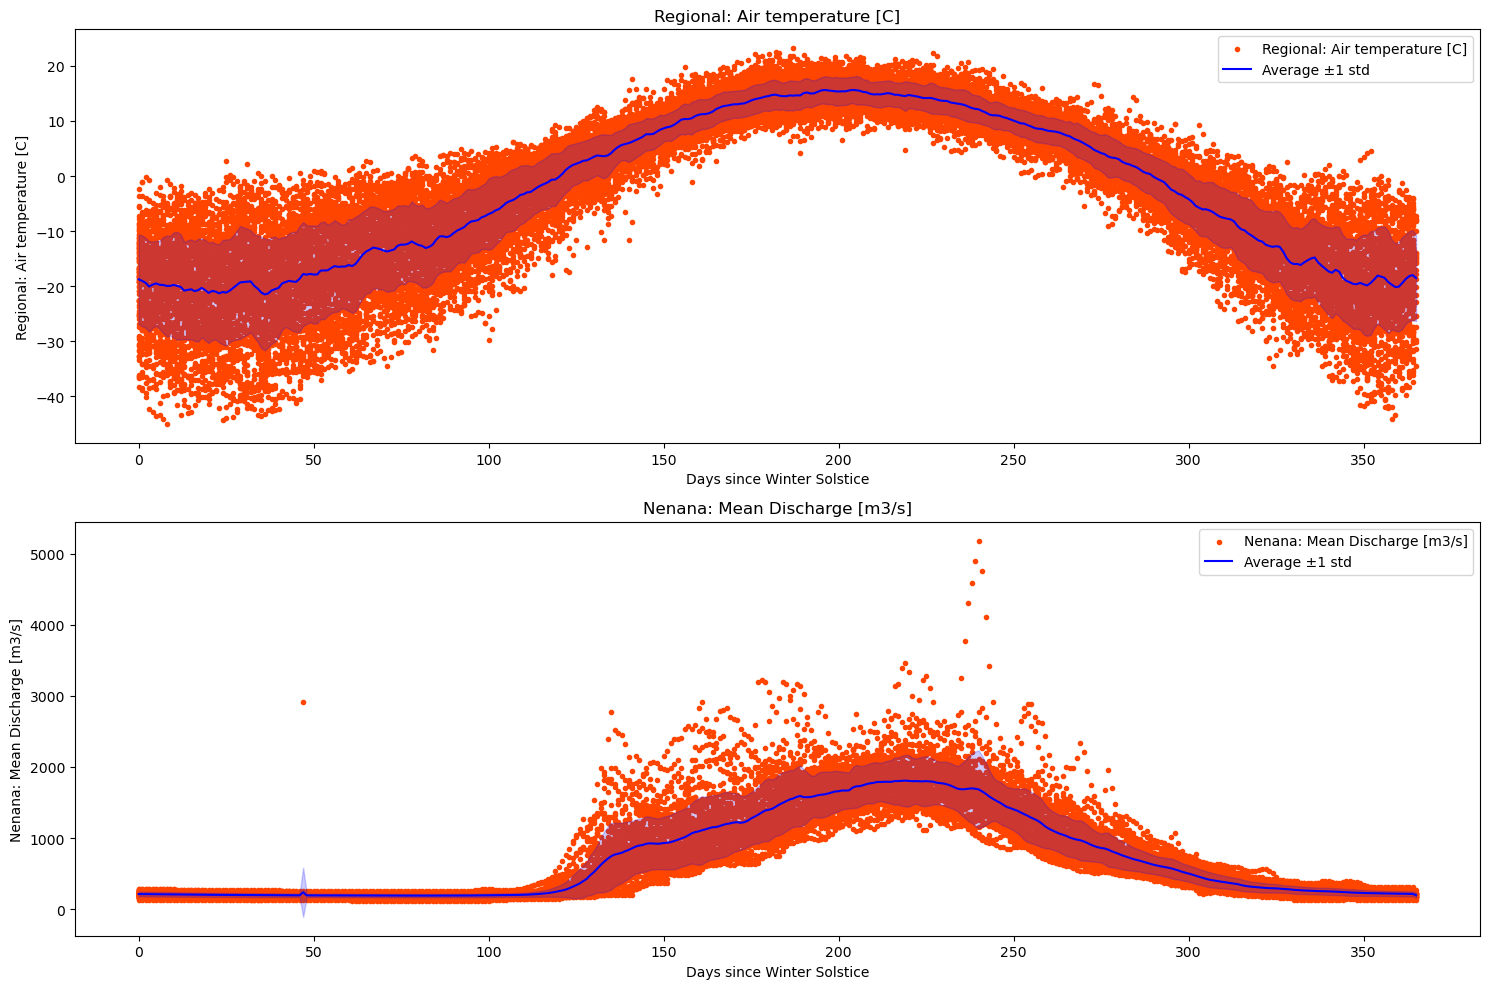

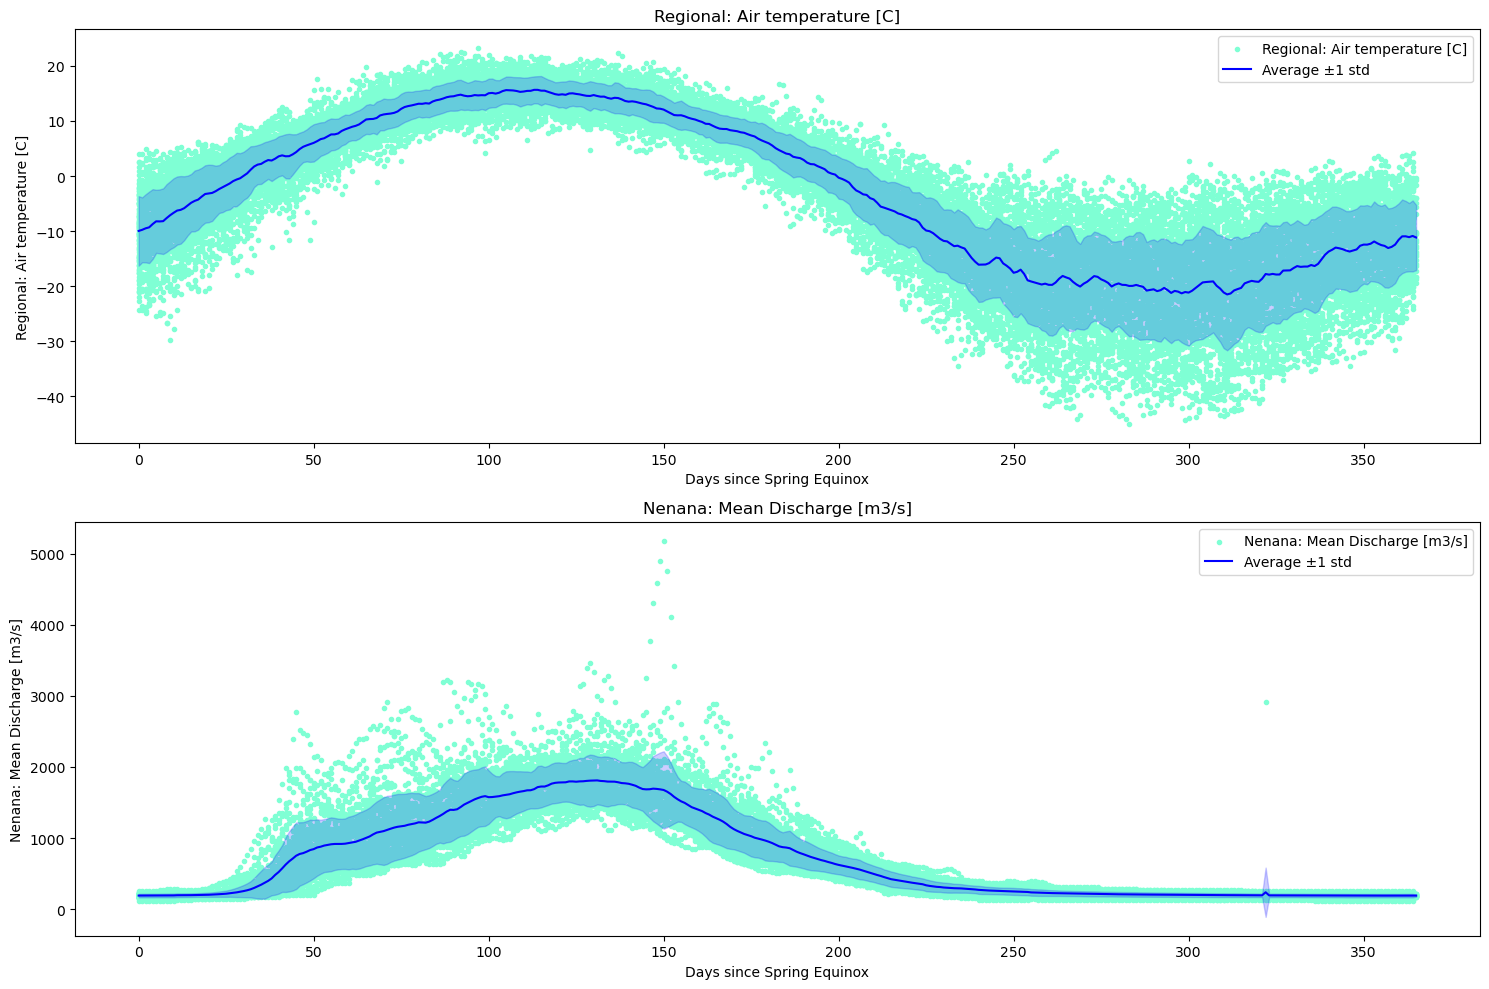

In [10]:
Data=days_since_last_date(Data,date_or_dates='Winter Solstice')
Data=days_since_last_date(Data,date_or_dates='Spring Equinox')
seasonal_trends(Data,k=1,plot_mean_std=True,columns_to_plot=['Regional: Air temperature [C]','Nenana: Mean Discharge [m3/s]'],xaxis='Winter Solstice')
seasonal_trends(Data,k=1,plot_mean_std=True,columns_to_plot=['Regional: Air temperature [C]','Nenana: Mean Discharge [m3/s]'],xaxis='Spring Equinox',color='aquamarine')